# data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print(df.shape)

(10886, 12)


In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

 no missing values are present

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
##grouping numerical feature in one side
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and  'datetime' not in feature]
numerical_features

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [7]:
##since,we have 2 types of numerical features mainly, discrete and continous
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<10]
discrete_features

['season', 'holiday', 'workingday', 'weather']

In [8]:
continous_feature =[feature for feature in numerical_features if feature not in discrete_features ]
continous_feature

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# 1

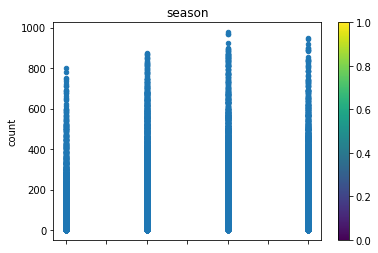

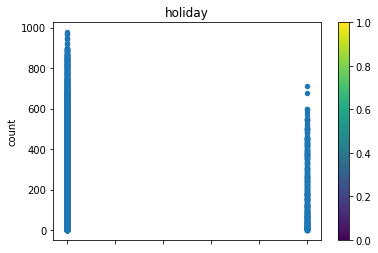

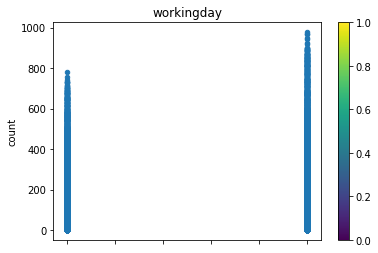

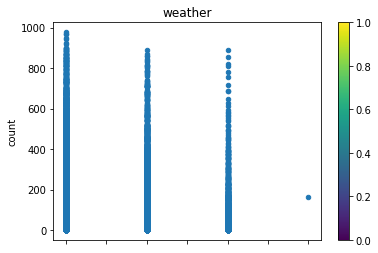

In [9]:
##considering count as a dependent column,we plot the scatter-plot of descrete feature for analysing it
for feature in discrete_features:
    data=df.copy()
    data.plot.scatter(x=feature,y='count',colormap='viridis')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

from the plot we see that the distribution fallows  Bernoulli distribution 

In [10]:
##from the plot we see that weather has only one value in 4th feature,let's dive deep by exploring it
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [11]:
##since the data is single and considered as outlier,we can drop it
df.drop(df[df['weather']==4].index,axis=0,inplace=True) 

In [12]:
##now grouping the weather data with count and understanding the describe
df.groupby('weather')['count'].describe() 

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


the results shows that the mean of three different values are different,
lets perform analysis of variance(ANOVA) to see the significant 

h0 - reflects the null hypthosis, mean is Same

h1 - denotes the alternative hypthosis, atleast one mean is different from other

In [13]:
from scipy.stats import f_oneway
alpha = 0.05
Stats,p_value = f_oneway(df['count'][df['weather']==1],
                               df['count'][df['weather']==2],
                               df['count'][df['weather']==3])
print('p_value is :',p_value)
if p_value > alpha :
  print('Accept null hypothesis' )
else:
  print(' Reject null hypothesis')

p_value is : 4.976448509904196e-43
 Reject null hypothesis


this conclude the weather has impact on count of tourist and from the scatter plot we see that ,weather1 has more tourist count as compared to other

the results conclude that the means of all the independent groups are not same,
now lets dive more by seeing which group is different from one another

In [14]:
##using Tukeys Honestly significant difference --- HSD
from statsmodels.stats.multicomp import MultiComparison 
mul_comp = MultiComparison(df['count'],df['weather'])   
mul_result = mul_comp.tukeyhsd()
print(mul_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -26.2813 0.001  -35.6159 -16.9466   True
     1      3 -86.3905 0.001 -101.5842 -71.1968   True
     2      3 -60.1092 0.001   -76.502 -43.7164   True
------------------------------------------------------


the results shows reject=True for all ,so three mean of each group differ from one another,hence the mean is significantly different and each group of weather has different impact on count

In [15]:
#analysing the season
#check the seasons describe
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


here also the means of all 4 group are different so they are significantly different and have different impact on count

In [16]:
alpha = 0.05
Stats,p_value = f_oneway(df['count'][df['season']==1],
                               df['count'][df['season']==2],
                               df['count'][df['season']==3],
                               df['count'][df['season']==4])
print('p_value is :',p_value)
if p_value > alpha :
  print('Accept null hypothesis' )
else:
  print(' Reject null hypothesis')

p_value is : 6.204069471997093e-149
 Reject null hypothesis


this conclude the season has impact on count of tourist and from the scatter plot we see that, season3 has hike the count of tourist

In [17]:
##using the two-way anova test to see the result of two different independent  variable on one dependent  variable.
import statsmodels.api as sm
from statsmodels.formula.api import ols
combined_feat = ols('count ~ C(weather) * C(season)',df).fit()
table = sm.stats.anova_lm(combined_feat, typ=2) # Type 2 Anova DataFrame
print(table)

                            sum_sq       df           F         PR(>F)
C(weather)            6.022043e+06      2.0   99.604322   1.361093e-43
C(season)             2.158708e+07      3.0  238.032851  1.350921e-149
C(weather):C(season)  5.588352e+05      6.0    3.081036   5.150817e-03
Residual              3.286889e+08  10873.0         NaN            NaN


from the results we see that p-values< 0.05 so there is significantly different among the count

In [18]:
#check the workingday describe
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7411.0,193.015787,184.525801,1.0,41.0,151.0,277.0,977.0


the results shows that the mean of workingday group is different ,let's dive by analysing the difference in the mean count  of workingday 0 and 1  using T-test

In [19]:
#dividing the workingday in its respective group
working_1 = df[df['workingday'] == 1]   
working_0 = df[df['workingday'] == 0]
print(working_1.shape,working_0.shape)

(7411, 12) (3474, 12)


In [20]:
##analysing the homogeneity variances 
##working_0 have 3474 rows and working_1 have 7411, fixing the same ratio in working_1 to.
##taking the sample size from the population 
working_1 = working_1.sample(3474)
from scipy import stats
tStat, pValue =  stats.levene(working_1['count'], working_0['count'])
print("p_value :",pValue)
if pValue > 0.05:
    print('Variances are same accept null hypothesis')
else:
    print('Variances are not same reject null hypothesis')

p_value : 0.770453710568045
Variances are same accept null hypothesis


hence Variances of the 2 samples are equal

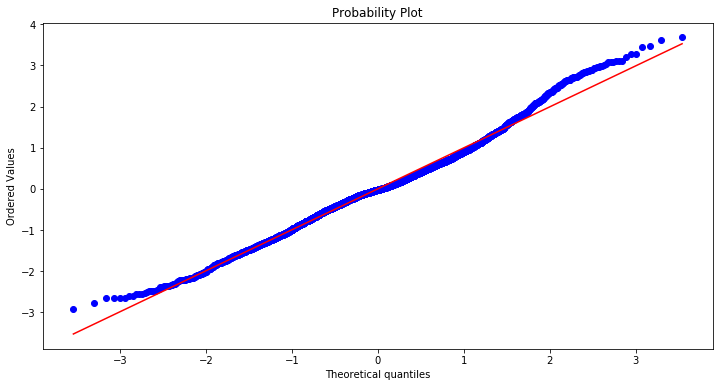

In [23]:
##checking either it fallows normal distribution or not
#first compute the difference between them  and scaledown the data 
from sklearn.preprocessing import scale
diff = scale((np.array(working_1['count']) - np.array(working_0['count'])))
plt.figure(figsize=(12,6))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

most of the points are overlapping the best fit line which proves that they are normally distributed,however few standard-deviation points are scattered from best fit,although most of the line close to the redline it is normal distribution


In [24]:
##implementing independent t-test
from scipy import stats
alpha = 0.05
statistic , p_value = stats.ttest_ind(working_1['count'],working_0['count'])
print('p_value :',p_value)
if p_value > alpha:
  print("Accept Null hypthosis")
else:
  print('Reject the null hypthosis')

p_value : 0.5602766410341585
Accept Null hypthosis


hence the tourist count is not influnced by workingday

In [25]:
#check the holiday describe
df.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10574.0,191.744278,181.521514,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [26]:
holiday_0 = df[df['holiday'] == 1]   
holiday_1 = df[df['holiday'] == 0]
print(holiday_1.shape,holiday_0.shape)

(10574, 12) (311, 12)


In [27]:
alpha = 0.05
statistic , p_value = stats.ttest_ind(holiday_0['count'],holiday_1['count'])
print('p_value :',p_value)
if p_value > alpha:
  print("there is no difference in mean")
else:
  print('There is difference in mean')

p_value : 0.5735386706500636
there is no difference in mean


hence the tourist count is not influnced by holiday

# 2

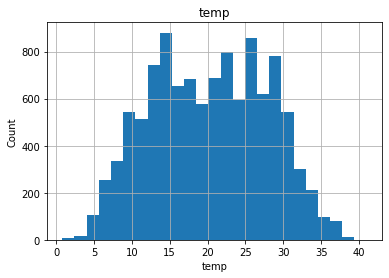

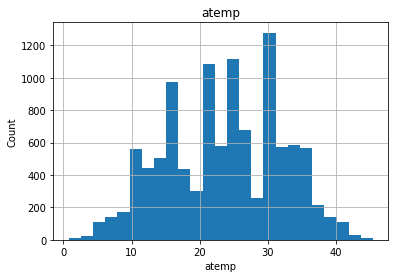

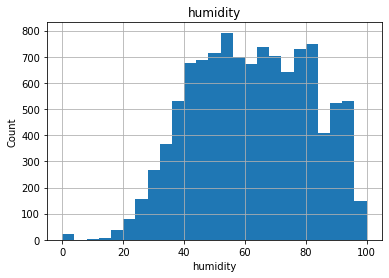

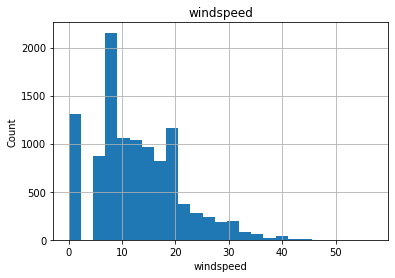

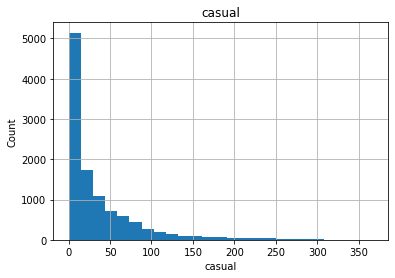

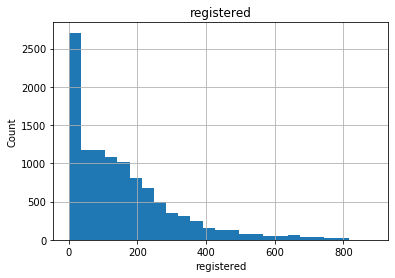

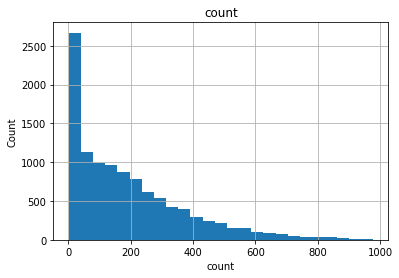

In [28]:
#plotting the continous feature
for feature in continous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

the graph fallows exponintaial distribution and close to normal distribution

In [30]:
##applying the chisquare test on casual 
data  = df.copy()
dataset = pd.crosstab(data['casual'],data['count'])
from scipy.stats import chi2_contingency
alpha = 0.05
stats,p_value,degrees_of_freedom,expected = chi2_contingency(dataset)
print(p_value)
if p_value > alpha:
  print(' Accept Null Hypothesis  count is  Independent on casual')
else:
  print(' Reject Null Hypothesis count is dependent on casual')

0.0
 Reject Null Hypothesis count is dependent on casual


hence this proved that if the  customer casually visit the site there is the chance that count may increased

In [37]:
##applying the chi-square test in registered and count 
crosstab = pd.crosstab(data['registered'],data['count'])
alpha = 0.05
stats,p_value,degrees_of_freedom,expected = chi2_contingency(crosstab)
print(p_value)
if p_value > alpha:
  print(' Accept Null Hypothesis  count is  Independent on registered')
else:
  print(' Reject Null Hypothesis count is dependent on registered')

0.0
 Reject Null Hypothesis count is dependent on registered


In [38]:
##applying the chi-square test in windspeed and count 
cross = pd.crosstab(data['windspeed'],data['count'])
alpha = 0.05
stats,p_value,degrees_of_freedom,expected = chi2_contingency(cross)
print(p_value)
if p_value > alpha:
  print(' Accept Null Hypothesis  count is  Independent of windspeed')
else:
  print(' Reject Null Hypothesis count is dependent on windspeed')

1.0
 Accept Null Hypothesis  count is  Independent of windspeed


here windspeed doesnot  influence of count becase of p_value > alpha

In [41]:
##applying the chi-square test in humidity and count 
tab = pd.crosstab(data['humidity'],data['count'])
alpha = 0.05
stats,p_value,degrees_of_freedom,expected = chi2_contingency(tab)
print(p_value)
if p_value > alpha:
  print(' Accept Null Hypothesis  count is  Independent of humidity')
else:
  print(' Reject Null Hypothesis count is dependent on humidity')

2.558233927614829e-16
 Reject Null Hypothesis count is dependent on humidity


In [42]:
##it seems like temp and atemp is similar,checking the correlation
df['atemp'].corr(df['temp'])

0.9849454118314125

well,temp and atemp has the correlation of 0.8949 .. which says that it provide the same information,can drop it.

In [43]:
data = df.copy()
data.drop(['atemp'],axis = 1,inplace=True)


In [44]:
##applying the chi-square test in temp and count 
tabcross = pd.crosstab(data['temp'],data['count'])
alpha = 0.05
stats,p_value,degrees_of_freedom,expected = chi2_contingency(tabcross)
print(p_value)
if p_value > alpha:
  print(' Accept Null Hypothesis  count is  Independent of temp')
else:
  print(' Reject Null Hypothesis count is dependent on temp')

4.608527822388507e-07
 Reject Null Hypothesis count is dependent on temp


# 3

In [45]:
#displaying the correlation with all features
data.corr()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
season,1.000000,0.029349,-0.008042,0.009392,0.258547,0.190795,-0.147241,0.096693,0.164026,0.163434
holiday,0.029349,1.000000,-0.250486,-0.007015,0.000270,0.001949,0.008396,0.043790,-0.020955,-0.005395
workingday,-0.008042,-0.250486,1.000000,0.033542,0.030067,-0.010960,0.013426,-0.319085,0.119461,0.011604
weather,0.009392,-0.007015,0.033542,1.000000,-0.054505,0.406114,0.007579,-0.135799,-0.109430,-0.128696
temp,0.258547,0.000270,0.030067,-0.054505,1.000000,-0.064783,-0.017973,0.467071,0.318608,0.394476
humidity,0.190795,0.001949,-0.010960,0.406114,-0.064783,1.000000,-0.318544,-0.348149,-0.265479,-0.317377
windspeed,-0.147241,0.008396,0.013426,0.007579,-0.017973,-0.318544,1.000000,0.092235,0.091056,0.101361
casual,0.096693,0.043790,-0.319085,-0.135799,0.467071,-0.348149,0.092235,1.000000,0.497259,0.690417
registered,0.164026,-0.020955,0.119461,-0.109430,0.318608,-0.265479,0.091056,0.497259,1.000000,0.970949
count,0.163434,-0.005395,0.011604,-0.128696,0.394476,-0.317377,0.101361,0.690417,0.970949,1.000000


In [46]:
##checking correlation with respect to count
highly_corr = df.corr()
high_corr_feat  = highly_corr.index[abs(highly_corr['count'])>0.5]

high_corr_feat

Index(['casual', 'registered', 'count'], dtype='object')

(3.5, -0.5)

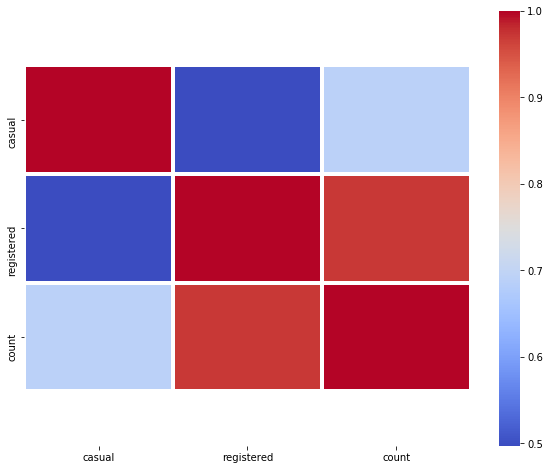

In [47]:
##plotting correlation with respect to count
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[high_corr_feat].corr(),cmap="coolwarm",linewidth = 3)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top-0.5)

the results shows that casual and count  have moderate correlation moreover registered and count is strongly positive correlated
this says that most of the registered visitor have been counted

In [48]:
##exploring the skewed data in continous_feature
continous_feature

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

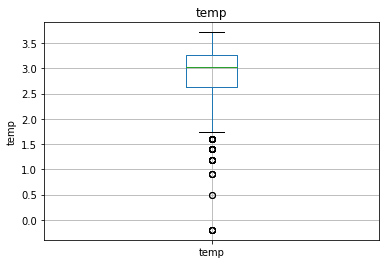

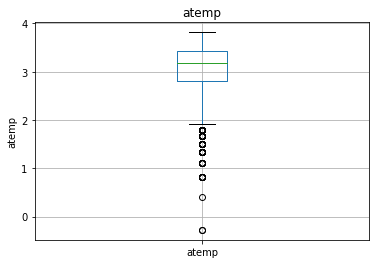

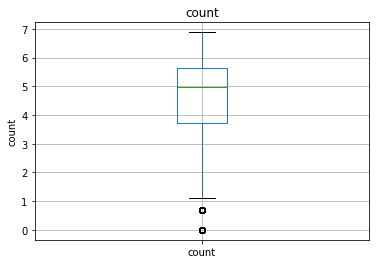

In [49]:
for feature in continous_feature :
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

the log normalized box plot of temp show that 0% is just below 2 count 25% is having count of above 2.5 ,50% is having count of exact 3.0 ,75% counting is around 3.3 and finally 100% is above 3.5 .Outliers are below 0% in this features could be also removed